<a href="https://colab.research.google.com/github/cjuangab/EstadisticayExploraciondeDatosII/blob/main/Evidencia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  **College Dataset**

**Tecnica 1:**


**Tecnica 2: Regresión Lineal Simple**

=== Promedio ponderado de carrera ~ Resultados semestre pasado (HC3) ===
                                  OLS Regression Results                                 
Dep. Variable:     Promedio ponderado de carrera   R-squared:                       0.962
Model:                                       OLS   Adj. R-squared:                  0.962
Method:                            Least Squares   F-statistic:                 2.536e+05
Date:                           Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                                   13:47:22   Log-Likelihood:                -1704.0
No. Observations:                          10000   AIC:                             3412.
Df Residuals:                               9998   BIC:                             3426.
Df Model:                                      1                                         
Covariance Type:                             HC3                                         
                           

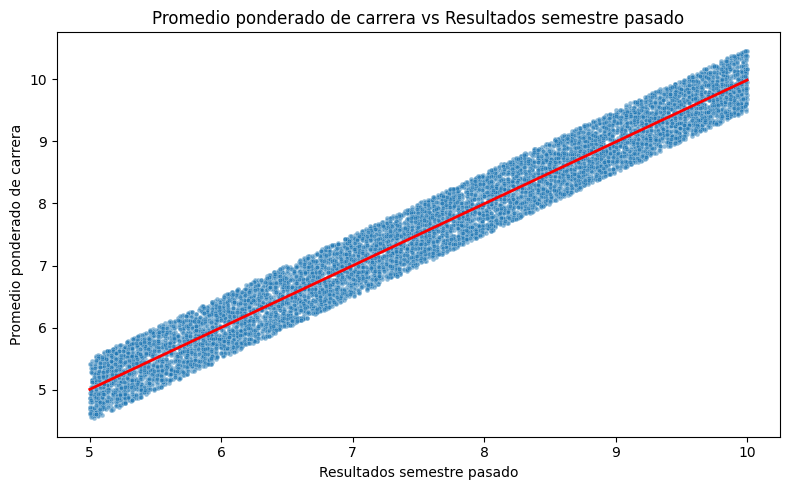

Ese R² tan alto es esperable si la X son resultados del semestre pasado, porque el promedio ponderado es 
acumulado y por construcción contiene el desempeño previo por lo que hay acoplamiento matemático.
Esto nos sirve mucho para predecir, pero no prueba causalidad.

Para poder probar causalidad no nos sirve una regresion simple, ya que el factor que prueba causalidad es la aleatorización
Con un corte transversal simple y una regresión, se obtiene asociación, no causalidad.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#carga data set
df = pd.read_csv('/content/Datos_Estudiantes.csv')

#renombro columnas para que sea mas legible
df = df.rename(columns={'CGPA': 'Promedio ponderado de carrera', 'Prev_Sem_Result': 'Resultados semestre pasado'})

def reg_simple(df, ycol, xcol):
    #limpio los datos sacando los #n/a y trabajo sobre la copia del df
    sub = df[[ycol, xcol]].dropna().copy()
    y = sub[ycol]
    x = sub[xcol]
    #agrego la variable independiente al modelo
    X = sm.add_constant(x)
    #realizo el entrenamiento
    m = sm.OLS(y, X).fit(cov_type='HC3')
    print(f"=== {ycol} ~ {xcol} (HC3) ===")
    print(m.summary())
    r = np.corrcoef(x, y)[0,1]
    print(f"Pearson r = {r:.3f}  |  R^2 = {r**2:.3f}")

    order = np.argsort(x.values)
    #defino el tamaño de la figura
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, s=12, alpha=0.5)
    plt.plot(x.values[order], m.fittedvalues.values[order], lw=2, color='red')
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.title(f'{ycol} vs {xcol}')
    plt.tight_layout(); plt.show()
    return m


m_prev = reg_simple(df, 'Promedio ponderado de carrera', 'Resultados semestre pasado')


print('Ese R² tan alto es esperable si la X son resultados del semestre pasado, porque el promedio ponderado es \n'
'acumulado y por construcción contiene el desempeño previo por lo que hay acoplamiento matemático.\n'
'Esto nos sirve mucho para predecir, pero no prueba causalidad.\n')

print('Para poder probar causalidad no nos sirve una regresion simple, ya que el factor que prueba causalidad es la aleatorización\n'
 'Con un corte transversal simple y una regresión, se obtiene asociación, no causalidad.')


**Interpretaciones**